# Python_Analysis
## 1  Preparing for python
We use python for data analysis in this assessment. First, we output the python version and import the required modules.

The main module is "sklearn", which is a great module to do machine learning. And we  also use some basic and drawing modules.

For the list of modules installed in python, see [requirements.txt](https://github.com/xiaozhang-github/DST_Assessment_1/blob/main/requirements.txt).

In [7]:
print(platform.python_version())

3.8.3


In [2]:
import platform
import numpy as np
import pandas as pd
import csv
import copy
import matplotlib.pyplot as plt
import pyecharts.options as opts
from pyecharts.charts import Line
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

## 2  Reading and preprocessing the data
### 2.1  Reading the data
The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic. This was processed into about five million connection records. Similarly, the two weeks of test data yielded around two million connection records.

"[kddcup.data_10_percent_corrected.csv](https://1drv.ms/f/s!AnIt27JVIncZbKhlUtJHWbXIwcc)" is 10% of these data, which is our analysis object this time.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type. In the above dataset, there are a total of 22 specific attacks, which can be divided into four main categories:

* DOS: denial-of-service, e.g. syn flood;

* R2L: unauthorized access from a remote machine, e.g. guessing password;

* U2R: unauthorized access to local superuser (root) privileges, e.g., various "buffer overflow" attacks;

* probing: surveillance and other probing, e.g., port scanning.

First, we read this dataset, add column names, and convert each specific attack type into the four main attack category it belongs to. Then we output it for observation.

In [3]:
## Column name
colnames = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
            'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
            'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
            'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
            'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','label']

## A mapping that transforms specific attack types into the four main attack categories
attacktype = {'label':{'normal.':'normal', 
                       'back.':'DOS', 'land.':'DOS', 'neptune.':'DOS', 'pod.':'DOS', 'smurf.':'DOS','teardrop.':'DOS',
                       'ftp_write.':'R2L', 'guess_passwd.':'R2L', 'imap.':'R2L', 'multihop.':'R2L', 
                       'phf.':'R2L', 'spy.':'R2L', 'warezclient.':'R2L', 'warezmaster.':'R2L', 
                       'buffer_overflow.':'U2R', 'loadmodule.':'U2R', 'perl.':'U2R', 'rootkit.':'U2R',
                       'ipsweep.':'probing', 'nmap.':'probing', 'portsweep.':'probing', 'satan.':'probing'}}

data = pd.read_csv('kddcup.data_10_percent_corrected.csv',header=None,names = colnames)
data.replace(attacktype,inplace=True)
data.to_csv('kddcup99.csv',index=False)
data.head()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Observing the above dataframe, we can find that there are a total of 494021 connections, each of which has 41 features and 1 label (normal or one of the four attack types).

Then we count these connections' labels.

In [4]:
data['label'].value_counts()

DOS        391458
normal      97278
probing      4107
R2L          1126
U2R            52
Name: label, dtype: int64

The number of DOS is the largest, followed by normal traffic, and the number of U2R is very small, which may affect the prediction of U2R attacks in the future.

### 2.2  Preprocessing the data
In order to bring the data into the models, we need to preprocess the data. From the dataframe above, we can see that the three features of "protocol_type", "service", "flag" and labels are character variables, we need to convert them into numerical variables.

First, we find the types of these character variables.

In [5]:
df_group = data.groupby(by = 'protocol_type')
list1 = list(df_group.groups.keys())
list1

['icmp', 'tcp', 'udp']

In [6]:
df_group = data.groupby(by = 'service')
list2 = list(df_group.groups.keys())
list2

['IRC',
 'X11',
 'Z39_50',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'hostnames',
 'http',
 'http_443',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois']

In [7]:
df_group = data.groupby(by = 'flag')
list3 = list(df_group.groups.keys())
list3

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

Then we turn them into numeric variables according to the specified mapping and output it.

In [8]:
## A mapping that transforms character variables into numeric variables
cleanup = {'protocol_type':{'tcp':1, 'icmp':2, 'udp':3},
           'service':{'vmnet': 1, 'smtp': 2, 'ntp_u':3, 'shell':4, 'kshell':5, 'aol':6, 'imap4':7, 'urh_i':8, 'netbios_ssn':9,
                      'tftp_u':10, 'mtp':11, 'uucp':12, 'nnsp':13, 'echo':14, 'tim_i':15, 'ssh':16, 'iso_tsap':17, 'time':18,
                      'netbios_ns':19,'systat':20, 'hostnames':21, 'login':22, 'efs':23, 'supdup':24, 'http_8001':25, 'courier':26,
                      'ctf':27,'finger':28,'nntp':29,'ftp_data':30,'red_i':31,'ldap':32,'http':33,'ftp':34,'pm_dump':35,'exec':36,
                      'klogin':37,'auth':38,'netbios_dgm':39,'other':40,'link':41,'X11':42,'discard':43,'private':44,'remote_job':45,
                      'IRC':46,'daytime':47,'pop_3':48,'pop_2':49,'gopher':50,'sunrpc':51,'name':52,'rje':53,'domain':54,'uucp_path':55,
                      'http_2784':56,'Z39_50':57,'domain_u':58,'csnet_ns':59,'whois':60,'eco_i':61,'bgp':62,'sql_net':63,'printer':64,
                      'telnet':65,'ecr_i':66,'urp_i':67,'netstat':68,'http_443':69,'harvest':70},
            'flag':{'RSTR':1, 'S3':2, 'SF':3, 'RSTO':4, 'SH':5, 'OTH':6, 'S2':7, 'RSTOS0':8, 'S1':9, 'S0':10 ,'REJ':11},
            'label':{'normal':1, 'DOS':2, 'R2L':3, 'U2R':4, 'probing':5}}

data1 = pd.read_csv('kddcup99.csv')
data1.replace(cleanup,inplace=True)
data1.to_csv('kddcup99_numeric.csv',index=False)
data1.head()
data1.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
service,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,...,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
flag,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,...,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,...,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


After processing, the data in the dataset"[kddcup99_numeric.csv](https://1drv.ms/f/s!AnIt27JVIncZbKhlUtJHWbXIwcc)]" is now all numeric, which is beneficial to building the classification models.

In this experiment, we mainly use decision trees, random forests, and naive Bayes models. They are probabilistic models and do not require data normalization.

## 3  Creating the unified training dataset and test dataset
### 3.1  Cross-validation
When choosing a model, the most basic method is cross-validation. It takes most of the dataset as the training dataset and a small part as the test dataset. We train the model on the former, predict the classification results on the latter, and compare each person’s model performance metrics.

We randomly divided a training dataset (70% of the total) and a test dataset (30%) in python for members who use different programming languages. Only when the training dataset and the test dataset are unified, the comparison between models is correct.

In [9]:
data1 = pd.read_csv('kddcup99_numeric.csv')
array = data1.values
x = array[:,0:41]
y = array[:,41]

## Divide training dataset and test dataset, random seed is 1
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

## Save the training dataset and test dataset as the csv files for all members to use
train = np.column_stack((train_x,train_y))
np.savetxt('kddcup99_train.csv',train, delimiter = ',',fmt='%.1f')
test = np.column_stack((test_x, test_y))
np.savetxt('kddcup99_test.csv', test, delimiter = ',',fmt='%.1f')
np.savetxt('kddcup99_test_unlabeled.csv', test_x, delimiter = ',',fmt='%.1f')

### 3.2  Creating the second test dataset
In the above cross-validation, the training dataset and the test dataset are derived from the same data set, but in the real world, the data to be predicted may come from other places. 

The kddcup1999 competition provides the second test dataset, which is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more **realistic**.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.

The new test dataset "[corrected.csv](https://1drv.ms/f/s!AnIt27JVIncZbKhlUtJHWbXIwcc)" contains the new 14 specific attacks, which can still be divided into four main attack categories. We perform the same processing on this dataset as above

In [12]:
## A mapping that transforms specific attack types into the four main attack categories
attacktype2 = {'label':{'normal.':'normal', 
                       'back.':'DOS', 'land.':'DOS', 'neptune.':'DOS', 'pod.':'DOS', 'smurf.':'DOS', 'teardrop.':'DOS', 'apache2.':'DOS','mailbomb.':'DOS','processtable.':'DOS','udpstorm.':'DOS',
                       'ftp_write.':'R2L', 'guess_passwd.':'R2L', 'imap.':'R2L', 'multihop.':'R2L', 'phf.':'R2L', 'spy.':'R2L', 'warezclient.':'R2L', 'warezmaster.':'R2L','named.':'R2L','sendmail.':'R2L','snmpgetattack.':'R2L','snmpguess.':'R2L','warezmaster.':'R2L','worm.':'R2L','xlock.':'R2L','xsnoop.':'R2L', 
                       'buffer_overflow.':'U2R', 'loadmodule.':'U2R', 'perl.':'U2R', 'rootkit.':'U2R','httptunnel.':'U2R','ps.':'U2R','rootkit.':'U2R','sqlattack.':'U2R','xterm.':'U2R',
                       'ipsweep.':'probing', 'nmap.':'probing', 'portsweep.':'probing', 'satan.':'probing','mscan.':'probing','saint.':'probing'}}

data2=pd.read_csv('corrected.csv',header=None,names = colnames)
data2.replace(attacktype2,inplace=True)
data2.to_csv('kddcup99_corrected.csv',index=False)

In [13]:
data3 = pd.read_csv('kddcup99_corrected.csv')
data3.replace(cleanup,inplace=True)
data3.to_csv('corrected_numeric.csv',index=False)
data3.head()
data3.transpose()

,0,1,2,3,4,5,6,7,8,9,...,300980,300981,300982,300983,300984,300985,300986,300987,300988,300989
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
service,44.00,44.00,44.00,44.00,44.00,44.00,58.0,44.00,44.00,33.00,...,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
flag,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00,3.00,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
src_bytes,105.00,105.00,105.00,105.00,105.00,105.00,29.0,105.00,105.00,223.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
dst_bytes,146.00,146.00,146.00,146.00,146.00,146.00,0.0,146.00,146.00,185.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We can see that there are 300990 data in the second test dataset.

In [37]:
## Save the new test dataset as the csv files for all members to use
data3 = pd.read_csv('corrected_numeric.csv', skiprows=2, header=None)
data3.to_csv('kddcup99_test2.csv',header=None,index=False)
array2 = data3.values
del data3[41]
data3.to_csv('kddcup99_test2_unlabeled.csv',header=None,index=False)
test_x2 = array2[:,0:41]
test_y2 = array2[:,41]

## 4  Building the classification models
We have established three models in python, including decision trees, random forests, and logistic regression. Among them, we mainly study decision trees. In addition, we established a naive Bayes model in r.
### 4.1  Decision Tree Model
Decision tree is a basic classification and regression method. Here we consider the decision tree used for classification. The decision tree model is a tree structure, where each internal node represents a test on an attribute, each branch represents a test output, and each leaf node represents a category. When learning, we use training data to establish a decision tree model based on the principle of minimizing the loss function; when predicting, we use the decision tree model to classify new data.

Decision tree learning usually includes three steps: 

* Feature selection

Usually the criterion for feature selection is **information** gain (or **information gain ratio**, **Gini index**, etc.). 

* Generation of decision tree

Starting from the root node, calculate the information gain of all possible features for the node, select the feature with the largest information gain as the feature of the node, establish sub-nodes from the different values of the feature, and then perform recursion.

* Pruning of decision tree

The solution to the over-fitting phenomenon is to consider the complexity of the decision tree and simplify the generated decision tree. This process is called pruning.

#### 4.1.1 Building a basic decision tree model

First, we build a basic decision tree model and bring the training dataset into it for learning, then predict the test dataset and output the prediction accuracy.

In [152]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_x, train_y)
pre_tree = clf_tree.predict(test_x)
acc_tree=accuracy_score(pre_tree, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_tree*100," %")

------------------------------------------
Accuracy =  99.95681715438542  %


#### 4.1.2  Adjusting the parameters

"sklearn.tree.DecisionTreeClassifier" has many parameters, now we find the best value of three important parameters. 

First we adjust the maximum depth of the decision tree，its usual value is 10-100. And we take different values between 10 and 30 and observe the prediction accuracy of the model.

In [14]:
def draw(x, y, name):
        a = Line()
        a.add_xaxis(x)
        a.add_yaxis(name,
                    y,
                    markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),
        )
        a.set_global_opts(title_opts=opts.TitleOpts(title=name),
        yaxis_opts=opts.AxisOpts(
            min_=99,
        ),)
        return a.render_notebook()

accuracy_list1 = []
name = [str(i) for i in range(10,31)]

for i in range(5,31):   
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', class_weight='balanced')
    clf.fit(train_x, train_y)
    prediction = clf.predict(test_x)
    acc = round(accuracy_score(prediction, test_y)*100, 2)
    accuracy_list1.append(acc)

draw(name, accuracy_list1, 'max_depth')

We can observe from the figure that when the maximum depth is less than 17, the accuracy of the model is low. When the maximum depth is greater than 17, the accuracy is maintained at a high level, so this parameter cannot be too small. In the end, we choose 17 as the maximum depth, at which time the model has the highest accuracy.


Second, we adjust the minimum number of samples required for the subdivision of internal nodes, ranging from 2 to 20.

In [17]:
def draw(x, y, name):
        a = Line()
        a.add_xaxis(x)
        a.add_yaxis(name,
                    y,
                    markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),
        )
        a.set_global_opts(title_opts=opts.TitleOpts(title=name),
        yaxis_opts=opts.AxisOpts(
            min_=99,
        ),)
        return a.render_notebook()

accuracy_list2 = []
name = [str(i) for i in range(2,21)]

for i in range(2,21):
    
    clf = DecisionTreeClassifier(max_depth=17, min_samples_split=i, criterion='entropy', class_weight='balanced')
    clf.fit(train_x, train_y)
    prediction = clf.predict(test_x)
    acc = round(accuracy_score(prediction, test_y)*100, 3)
    accuracy_list2.append(acc)

draw(name, accuracy_list2, 'min_samples_split')

From the figure we observe that this parameter has little effect on the accuracy of the model, and finally we choose the best value 3.


Third, we adjust the minimum impurity of node division, here we use "GridSearchCV" to find the best value.

In [335]:
thresholds = np.linspace(0, 0.2, 50)
param_grid = {'min_impurity_decrease':thresholds}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(train_x, train_y)

print("best_parms:{0}\nbest_score:{1}".format(clf.best_params_, clf.best_score_))

best_parms:{'min_impurity_decrease': 0.0}
best_score:0.9996790181252653


Through the output, we know that the best value of "min_impurity_decrease" is 0, which is the default value.

However, it is only the result of considering a single parameter, considering the combination of multiple parameters to find the best value of a parameter is a more feasible method.

In [34]:
entropy_thresholds = np.linspace(0, 1, 100)
gini_thresholds = np.linspace(0, 0.2, 100)
param_grid = [{'criterion': ['entropy'], 'min_impurity_decrease': entropy_thresholds},
              {'criterion': ['gini'], 'min_impurity_decrease': gini_thresholds},
              {'max_depth': np.arange(10,30)},
              {'min_samples_split': np.arange(2,20,2)}]
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(train_x, train_y)

print("best param:{0}\nbest score:{1}".format(clf.best_params_, clf.best_score_))

best param:{'criterion': 'entropy', 'min_impurity_decrease': 0.0}
best score:0.9996096171902871


In this case, its optimal value of "min_impurity_decrease" is still 0, which is the default value.
#### 4.1.3  Updating the  decision tree model
In general, we selected the best values of the three parameters and used them to improve the model.

In [19]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=3, class_weight='balanced')
clf_tree.fit(train_x, train_y)
pre_tree = clf_tree.predict(test_x)
acc_tree=accuracy_score(pre_tree, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_tree*100," %")

------------------------------------------
Accuracy =  99.96491393793815  %


The accuracy of the new decision tree model is 99.9649%, which is higher than the accuracy of the previous model of 99.9568%, indicating that the adjustment of the parameters is successful.
#### 4.1.4 Feature importances
The data set has a total of 41 features, which is very large, but the importance of them is different in the training of the model.

[]

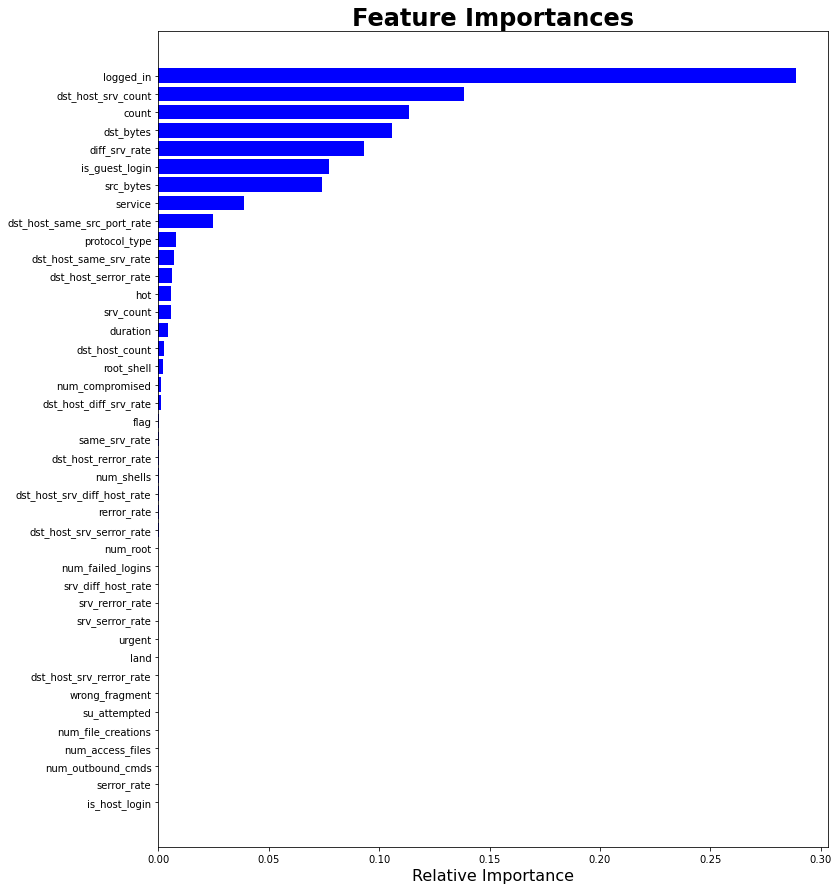

In [20]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
            'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
            'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
            'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'
            ,'dst_host_rerror_rate','dst_host_srv_rerror_rate']
importances = clf_tree.feature_importances_
indices = np.argsort(importances)
fig = plt.figure(figsize=(12,15))
plt.title('Feature Importances',fontsize=24, fontweight= 'black')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=16)
plt.plot()

The feature "logged_in" is the most important one, and there are also some other important features, such as "dst_host_srv_count", "count" and more. But the remaining features are not important.

### 4.2  Naive Bayes Model
This model is built in R, please read [R_Analysis](https://github.com/xiaozhang-github/DST_Assessment_1/blob/main/report/03-R_analysis.Rmd) for details.

Here we will read the prediction result [nbpred1.csv](https://1drv.ms/f/s!AnIt27JVIncZbKhlUtJHWbXIwcc) of the model, which is output by R, and perform subsequent analysis.

In [24]:
data4 = pd.read_csv('nbpred1.csv', skiprows=1, header=None)
array3 = data4.values
pre_nb = array3[:,1]
acc_nb=accuracy_score(pre_nb, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_nb*100," %")

------------------------------------------
Accuracy =  87.65712820582023  %


### 4.3  Random Forest Model
Random forest is an algorithm that integrates multiple trees through the idea of ensemble learning. Its basic unit is a decision tree, and its essence belongs to a large branch of machine learning -- Ensemble Learning method.

Each decision tree is a classifier, then for an input sample, N trees will have N classification results. Random forest integrates all the classification voting results, and designates the category with the most votes as the final output. This is a kind of Bagging idea.

We use the "RandomForestClassifier()" in the module "sklearn" to build the model.

In [27]:
clf_forest = RandomForestClassifier(oob_score=True, max_depth=17)
clf_forest.fit(train_x, train_y)
pre_forest = clf_forest.predict(test_x)
acc_forest=accuracy_score(pre_forest, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_forest*100," %")

------------------------------------------
Accuracy =  99.97233598952816  %


### 4.4  Logistic Regression Model
Regression is one of the most basic models. Now we use the "SGDClassifier()" in the module "sklearn" to build the model, which uses stochastic gradient descent and logistic regression.

In [25]:
clf_log = SGDClassifier(loss='log')
clf_log.fit(train_x, train_y)
pre_log = clf_log.predict(test_x)
acc_log=accuracy_score(pre_log, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_log*100," %")

------------------------------------------
Accuracy =  97.9521884931211  %


## 5  Performance metrics
When establishing above four classification models, we output the accuracy of each model by the way. According to this metric, the order of classifier performance is: Random Forest > Decision Tree > Logistic Regression > Naive Bayes.

But only the accuracy is used to evaluate The model is not enough, we need to introduce other metrics. Therefore, we choose four numerical metrics: **accuracy, precision, recall, F1 score**, and two visual metrics: **confusion matrix, ROC curve**.
### 5.1 Calculating accuracy, precision, recall and F1-score
In the binary classification problem, we introduce the following concepts：

* True positives (TP): cases in which we predicted yes, and they are actually yes.

* True negatives (TN): cases in which we predicted no, and they are actually no.

* False positives (FP): cases in which we predicted yes, but they are actually no.

* False negatives (FN): cases in which we predicted no, but they are actually yes.

Then we can use them to calculate accuracy, precision, recall and F1-score:

* Accuracy = (TP+TN)/total

The ratio of the number of correctly classified samples to the total number of samples

* Precision = TP/(TP+FP)

How many of the samples predicted to be positive are truly positive

* Recall = TP/(TP+FN)

How many positive examples in the sample are predicted correctly

* F1-Score = (Precision * Recall)/(Precision+Recall)

F1-score is the harmonic mean of precision and recall

Accuracy is an overall metric, but it does not apply to all practical problems. So we have introduced precision and recall. In actual problems, it is possible to increase the one at the cost of reducing another one.These two metrics are usually used together to compare precision with a fixed recall rate, or compare the recall rate with a fixed precision. Another way to use precision and recall is to combine them into one metric, which is the F1-score.

In the n classification problem (n>2), we use the **weighted macro-average** method to calculate the precision, recall and F1-score, which means that we split the evaluation of n classifications into n two classifications, calculate the metric of each two classification, and multiply it by the proportion of the class in the total number of samples.

First, we calculate the accuracy, precision, recall and F1-score of this five classification problem by above methond.

In [29]:
def cal_APRF(pre,test):
    result = []
    ACC = round(100*(accuracy_score(pre, test)),3)
    result.append(ACC)
    # Precision
    P = round(100*(precision_score(pre, test, average="weighted")),3)
    result.append(P)
    # Recall 
    R = round(100*(recall_score(pre, test, average="weighted")),3)
    result.append(R)
    # F1-Score
    F = round(100*(f1_score(pre, test, average="weighted")),3)
    result.append(F)
    return result

score1 = cal_APRF(pre_nb,test_y)
score2 = cal_APRF(pre_log,test_y)
score3 = cal_APRF(pre_tree,test_y)
score4 = cal_APRF(pre_forest,test_y)

Then we draw a bar graph to represent the four metrics of the four models.

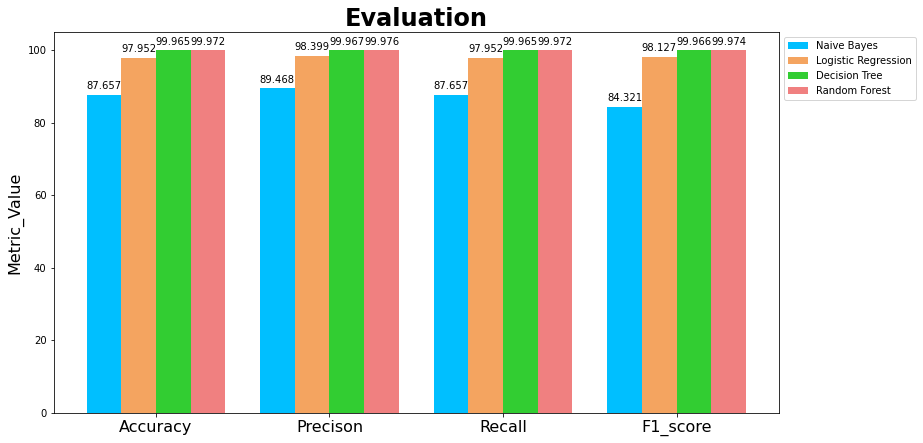

In [31]:
def draw_APRF(score1,score2,score3,score4):
    plt.figure(figsize=(13,7))
    metric = ('Accuracy', 'Precison', 'Recall', 'F1_score', )
    bar_width = 0.2  
    index_nb = np.arange(len(metric))
    index_log = index_nb + bar_width  
    index_tree = index_log + bar_width  
    index_forest = index_tree + bar_width

    p1 = plt.bar(index_nb, height=score1, width=bar_width, color='deepskyblue',label='Naive Bayes')
    p2 = plt.bar(index_log, height=score2, width=bar_width, color='sandybrown',label='Logistic Regression')
    p3 = plt.bar(index_tree, height=score3, width=bar_width, color='limegreen',label='Decision Tree')
    p4 = plt.bar(index_forest, height=score4, width=bar_width, color='lightcoral',label='Random Forest')

    #Mark the value on the graph
    for p in p1:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p2:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p3:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p4:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")

    plt.legend(bbox_to_anchor=(1, 1))  
    plt.xticks(index_log + bar_width/2, metric, fontsize=16)  
    plt.ylabel('Metric_Value', fontsize=16)  
    plt.title('Evaluation', fontsize=24, fontweight= 'black')  
    plt.show()
    
draw_APRF(score1,score2,score3,score4)

It can be observed from the figure that the four metrics of random forest are the best, followed by decision tree, whose score is very close to random forest. The classification performance of logistic regression and naive Bayes is relatively poor.

This result is in line with our cognition. Logistic regression and naive Bayes are traditional methods with insufficient performance, and our model may have defects. For example, the module (or library) method is not the best, or the best parameters are not selected.

Decision trees and random forests are more advanced machine learning methods, and their classification performance is better. And random forest is a combination model of decision trees, so the performance is better than decision trees. This report did not conduct in-depth research on random forests, and its performance should be better.
### 5.2  Drawing the confusion matrix
In the field of machine learning, confusion matrix is a specific matrix used to visualize the performance of an algorithm, and is often used for supervised learning. Each column represents the predicted category, and each row represents the actual category.

In this five-category problem, the above four numerical metrics use weighted macro-averagewe method, which represents the overall evaluation of the five categories of predictions. Now we can observe the predictions of each of the five categories through the confusion matrix, of course, the precison and recall of each category can also be calculated.

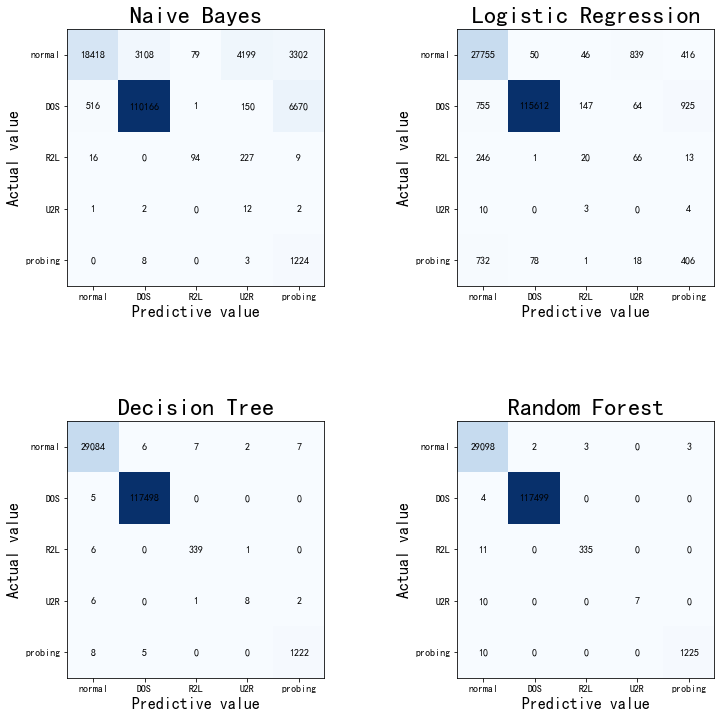

In [180]:
def draw_cm(matrix, matrix2, matrix3, matrix4):
    plt.figure(figsize=(12,12))
    label=np.array(['normal', 'DOS', 'R2L', 'U2R', 'probing'])
    cm=np.array([matrix, matrix2, matrix3, matrix4])
    title=np.array(['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
    
    for k in range(4):
        plt.subplot(2,2,k+1)
        plt.imshow(cm[k], cmap=plt.cm.Blues)
        plt.xticks(range(5), label)
        plt.yticks(range(5), label)
        plt.xlabel('Predictive value',fontsize=16)
        plt.ylabel('Actual value',fontsize=16)
        plt.title(title[k], fontsize=24, fontweight= 'black')

        for i in range(5):    
            for j in range(5):    
                plt.text(j, i, cm[k][i][j],ha="center", va="center")
        
    plt.tight_layout(8)
    plt.show()

matrix1 = confusion_matrix(test_y, pre_nb) 
matrix2 = confusion_matrix(test_y, pre_log)
matrix3 = confusion_matrix(test_y, pre_tree)
matrix4 = confusion_matrix(test_y, pre_forest)
draw_cm(matrix1, matrix2, matrix3, matrix4)

According to the above figure, when predicting normal traffic, the performance of decision tree and random forest is better;

When predicting DOS attacks, decision trees and random forests are also very good. Only 4 or 5 of about 120,000 pieces of data are incorrectly predicted as normal traffic;

As for R2L attacks, the performance of decision trees and random forests is also better;

But for U2R attacks, Naive Bayes has the best classification effect, and all predictions of logistic regression are wrong, which means that the effect is very poor;

For probing attacks, in addition to logistic regression, the performance of other models is good.

Through the above analysis, we found that although the overall performance of decision trees and random forests is the best, their prediction effect for U2R is average. This may be because the number of samples is too small. Although the overall performance metric of Naive Bayes is low, the prediction performance of U2R and probing is good, especially U2R is the best of all classifiers.
### 5.3  Drawing the POC curve
The full name of ROC is Receiver Operating Characteristic, and its main analysis tool is a curve drawn on a two-dimensional plane-ROC curve. The abscissa of the plane is false positive rate (FPR), and the ordinate is true positive rate (TPR).

* TPR = TP/(TP+FN)

The ratio of correctly judged positive among all the samples that are actually positive, . 

* FPR = FP/(FP+TN)

The rate of false positives among all samples that are actually negative.

The value of Area Under ROC Curve (AUC)is the size of the area under the ROC curve. Generally, the value of AUC is between 0.5 and 1.0, and a larger AUC represents better performance.

Drawing the ROC curve of the five classification problem is complicated, and the metricss of the five classification problem are enough, so we use the ROC curve to judge the performance of the two classification model (normal or attack) from another angle.

First, we convert the five-category data into binary data.

In [32]:
#Convert five categories into two categories
def cleanup_2cate(array):
    array_2cate = copy.deepcopy(array)
    array_2cate[np.where(array==2)] = 0
    array_2cate[np.where(array==3)] = 0
    array_2cate[np.where(array==4)] = 0
    array_2cate[np.where(array==5)] = 0
    return array_2cate

test_y_2cate = cleanup_2cate(test_y)
pre_nb_2cate = cleanup_2cate(pre_nb)
pre_log_2cate = cleanup_2cate(pre_log)
pre_tree_2cate = cleanup_2cate(pre_tree)
pre_forest_2cate = cleanup_2cate(pre_forest)

Then we draw the ROC curve.

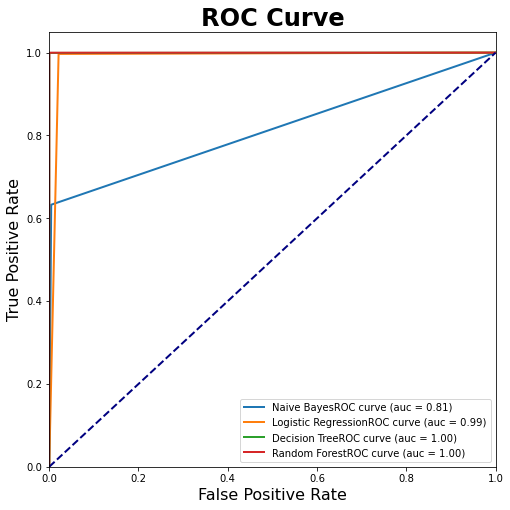

In [35]:
def draw_ROC(test_y_2cate, pre_nb_2cate, pre_log_2cate, pre_tree_2cate, pre_forest_2cate):
    pre_2cate = np.array([pre_nb_2cate, pre_log_2cate, pre_tree_2cate, pre_forest_2cate])
    fpr = []
    tpr = []
    roc_auc = []
    
    for k in range(4):
        fpr1, tpr1, threshold1 = roc_curve(test_y_2cate, pre_2cate[k])  
        roc_auc1 = auc(fpr1, tpr1)  
        fpr.append(fpr1)
        tpr.append(tpr1)
        roc_auc.append(roc_auc1)
        
    title=np.array(['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
    
    plt.figure(figsize=(8, 8))
    
    for k in range(4):
        plt.plot(fpr[k], tpr[k], lw=2, label=title[k]+'ROC curve (auc = %0.2f)' % roc_auc[k])  

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize=24, fontweight= 'black')
    plt.legend(loc="lower right")
    plt.show()
    
draw_ROC(test_y_2cate,pre_nb_2cate, pre_log_2cate, pre_tree_2cate, pre_forest_2cate)

According to the above figure, we can know that when classifying normal traffic and attacks, the AUC of decision trees and random forests is the largest, which means that their performance is the best (their ROC curves overlap). The AUC value of Naive Bayes is the smallest, and the classification performance is the worst.
## 6 Repeating the above operations on the second testing dataset
The second test dataset is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more **realistic**. Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.

Therefore, we use the four models we built before to predict test dataset which have different probability distributions and new attack types, so that we can verify whether the model is applicable to new data in the real world.

First, we output the prediction accuracy of the four models.

In [42]:
pre_tree2 = clf_tree.predict(test_x2)
acc_tree2 = accuracy_score(pre_tree2, test_y2)
print("------------------------------------------")
print("Accuracy of decision tree = ",acc_tree2*100," %")

------------------------------------------
Accuracy of decision tree =  93.62468395854998  %


In [43]:
data5 = pd.read_csv('nbpred2.csv', skiprows=1, header=None)
array4 = data5.values
pre_nb2 = array4[:,1]
acc_nb2 = accuracy_score(pre_nb2, test_y2)
print("------------------------------------------")
print("Accuracy of naive bayes = ",acc_nb2*100," %")

------------------------------------------
Accuracy of naive bayes =  73.96948061224829  %


In [44]:
pre_forest2 = clf_forest.predict(test_x2)
acc_forest2 = accuracy_score(pre_forest2, test_y2)
print("------------------------------------------")
print("Accuracy of random forest = ",acc_forest2*100," %")

------------------------------------------
Accuracy of random forest =  93.8011023658672  %


In [45]:
pre_log2 = clf_log.predict(test_x2)
acc_log2 = accuracy_score(pre_log2, test_y2)
print("------------------------------------------")
print("Accuracy of logistic regression = ",acc_log2*100," %")

------------------------------------------
Accuracy of logistic regression =  81.3481555804365  %


Although the accuracy ranking of the four models has not changed, their accuracy rates have all declined. The decline of decision trees and random forests is small, about 6%; the decline of naive Bayes and logistic regression is larger, exceeding 13%, so decision trees and random forests have better performance when facing new data which have different probability distributions and new attack types, but there is still a certain loss.

Second, we calculate the four numerical matrics of the four models on the new test set, including accuracy, precision, recall, and F1 score.

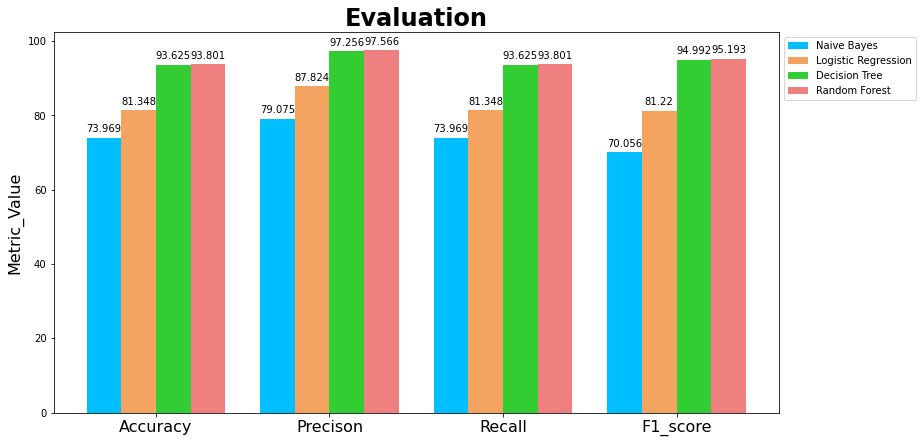

In [47]:
score21 = cal_APRF(pre_nb2,test_y2)
score22 = cal_APRF(pre_log2,test_y2)
score23 = cal_APRF(pre_tree2,test_y2)
score24 = cal_APRF(pre_forest2,test_y2)
draw_APRF(score21,score22,score23,score24)

We get the same conclusion as above, which means decision trees and random forests have better performance when facing new data which have different probability distributions and new attack types.

Third, we draw the confusion matrix.

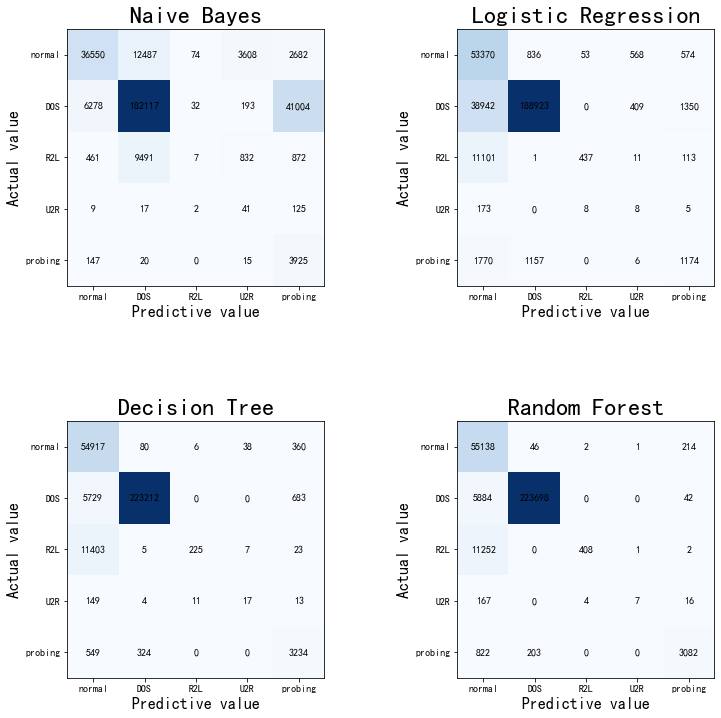

In [181]:
matrix21 = confusion_matrix(test_y2, pre_nb2) 
matrix22 = confusion_matrix(test_y2, pre_log2)
matrix23 = confusion_matrix(test_y2, pre_tree2)
matrix24 = confusion_matrix(test_y2, pre_forest2)
draw_cm(matrix21, matrix22, matrix23, matrix24)

The prediction performance of the four models for the five categories all decreased, and the performance loss was the smallest when identifying normal, followed by DOC. It is worth noting that all classifiers have very poor predictions for R2L and U2R, which shows that when facing new data, which means that all classifiers are no longer suitable for predicting these two attacks.

Finally we draw the ROC curve.

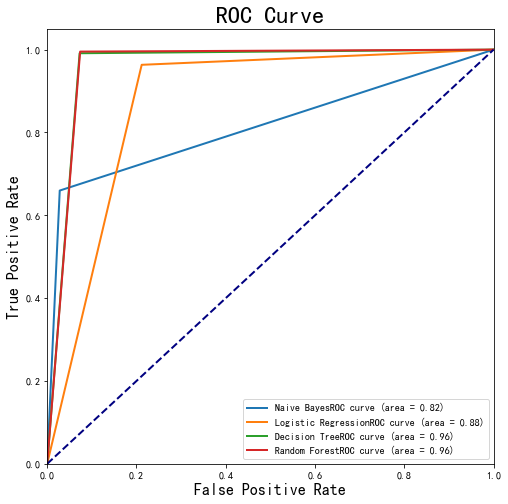

In [183]:
test_y2_2cate = cleanup_2cate(test_y2)
pre_nb2_2cate = cleanup_2cate(pre_nb2)
pre_log2_2cate = cleanup_2cate(pre_log2)
pre_tree2_2cate = cleanup_2cate(pre_tree2)
pre_forest2_2cate = cleanup_2cate(pre_forest2)
draw_ROC(test_y2_2cate, pre_nb2_2cate, pre_log2_2cate, pre_tree2_2cate, pre_forest2_2cate)

When classifying normal traffic and attacks, decision trees and random forests have better performance when facing new data which have different probability distributions and new attack types.
## 7 Conclusion
In this experiment, we established four models, including decision tree, random forest, naive Bayes, and logistic regression.

When performing cross-validation, decision trees and random forests have the best overall performance in two classification problems and five classification problems, but their performance is average when predicting U2R attacks; although the overall performance of naive Bayes is the worst, but its performance of predicting probing attacks is very good, and the performance of predicting U2R attacks is best. So we can choose the right model for different purposes.

When predicting data which have new probability distributions and new attacks, the performance of all classifiers has declined, among which decision trees and random forests have the least decline. These two models can still be used to predict normal traffic, DOS attacks and probing attacks, but it is not suitable for predicting R2L attacks and U2R attacks.

## 8 Reference
http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html -- Kddcup99 data

http://kdd.ics.uci.edu/databases/kddcup99/task.html -- Description of the task of building an intrusion detector

https://1drv.ms/f/s!AnIt27JVIncZbKhlUtJHWbXIwcc -- Processed data

https://github.com/Saurabh2805/kdd_cup_99.git -- The data analysis about kddcup99

https://github.com/cxmirene/KDDCUP99-Detection.git -- The data analysis about kddcup99

https://github.com/raghu1813/kddcup99-classification.git -- The data analysis about kddcup99

https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier -- sklearn.tree.DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html -- sklearn.ensemble.RandomForestClassifier

https://scikit-learn.org/stable/modules/sgd.html -- Stochastic Gradient Descent

https://www.cnblogs.com/gatherstars/p/6084696.html -- ROC and AUC

https://blog.csdn.net/wait_for_eva/article/details/82355038 -- confusion matrix



